<a href="https://colab.research.google.com/github/michaelb3245/DSRP--MichaelBriglall/blob/main/Gallstone_Dataset_Michael_Briglall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Among individuals with gallstones, what is the average BMI? Is it significantly different from those without gallstones?

In [107]:
import statsmodels.stats.multicomp as mc

In [108]:
import matplotlib.pyplot as plt

In [109]:
import numpy as np

In [110]:
import pandas as pd

In [111]:
from scipy.stats import ttest_ind

In [112]:
path = "/content/drive/MyDrive/Gallstone Dataset - Michael Briglall/dataset-uci (3).csv"
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,1,0,50,0,0,0,0,0,0,185,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,2,0,47,0,1,0,0,0,0,176,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,3,0,61,0,0,0,0,0,0,171,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,4,0,41,0,0,0,0,0,0,168,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,5,0,42,0,0,0,0,0,0,178,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [113]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Dropped 'Unnamed: 0' column.\n")

Dropped 'Unnamed: 0' column.



In [114]:
df = df[['Body Mass Index (BMI)', 'Gallstone Status', 'Gender']]

In [115]:
df["Gender"].value_counts()

,count
Gender,
0,162
1,157


In [116]:
df["Gallstone Status"].value_counts()

,count
Gallstone Status,
0,161
1,158


In [117]:
df[df.duplicated()]

,Body Mass Index (BMI),Gallstone Status,Gender
8,27.1,0,0
18,31.2,0,0
32,30.8,0,0
33,28.2,0,0
34,27.2,0,0
...,...,...,...
304,25.0,1,0
312,28.0,1,0
313,33.2,1,1
314,28.0,1,0


In [118]:
df.duplicated().sum()

np.int64(65)

In [119]:
df.dtypes

,0
Body Mass Index (BMI),float64
Gallstone Status,int64
Gender,int64


In [120]:
df.info

<bound method DataFrame.info of      Body Mass Index (BMI)  Gallstone Status  Gender
0                     27.1                 0       0
1                     30.5                 0       0
2                     31.2                 0       0
3                     24.0                 0       0
4                     28.3                 0       0
..                     ...               ...     ...
314                   28.0                 1       0
315                   21.7                 1       1
316                   32.7                 1       0
317                   28.2                 1       1
318                   26.8                 1       1

[319 rows x 3 columns]>

In [121]:
categorical_columns = ['Gallstone Status', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)',
                       'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)',
                       'Visceral Fat Rating (VFR)', 'Hepatic Fat Accumulation (HFA)']

In [122]:
category_mappings = {
    'Gallstone Status': {0: 'No Gallstones', 1: 'Gallstones'},
    'Gender': {0: 'Female', 1: 'Male'},
    'Comorbidity': {0: 'No Comorbidity', 1: 'Comorbidity'},
    'Coronary Artery Disease (CAD)': {0: 'No CAD', 1: 'CAD'},
    'Hypothyroidism': {0: 'No Hypothyroidism', 1: 'Hypothyroidism'},
    'Hyperlipidemia': {0: 'No Hyperlipidemia', 1: 'Hyperlipidemia'},
    'Diabetes Mellitus (DM)': {0: 'No DM', 1: 'DM'},
    'Hepatic Fat Accumulation (HFA)': {0: 'Normal', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
}

In [123]:
for column, mapping in category_mappings.items():
  if column in df.columns:
    df[column] = df[column].map(mapping)
    df[column] = df[column].astype("category")

In [124]:
Q1 = df['Body Mass Index (BMI)'].quantile(0.25)
Q3 = df['Body Mass Index (BMI)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Body Mass Index (BMI)'] >= lower_bound) & (df['Body Mass Index (BMI)'] <= upper_bound)]

In [125]:
df.head()

,Body Mass Index (BMI),Gallstone Status,Gender
0,27.1,No Gallstones,Female
1,30.5,No Gallstones,Female
2,31.2,No Gallstones,Female
3,24.0,No Gallstones,Female
4,28.3,No Gallstones,Female


In [126]:
df.head()

,Body Mass Index (BMI),Gallstone Status,Gender
0,27.1,No Gallstones,Female
1,30.5,No Gallstones,Female
2,31.2,No Gallstones,Female
3,24.0,No Gallstones,Female
4,28.3,No Gallstones,Female


In [127]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
    print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 65
Duplicate rows removed.
Number of duplicate rows after removal: 0


/tmp/ipython-input-2502748139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [128]:
average_bmi = df.groupby('Gallstone Status')['Body Mass Index (BMI)'].mean().reset_index()
average_bmi.columns = ['Gallstone Status', 'Average BMI']

/tmp/ipython-input-392615989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi = df.groupby('Gallstone Status')['Body Mass Index (BMI)'].mean().reset_index()


In [129]:
desired_order = ['No Gallstones', 'Gallstones']
average_bmi['Gallstone Status'] = pd.Categorical(average_bmi['Gallstone Status'], categories=desired_order, ordered=True)
average_bmi = average_bmi.sort_values('Gallstone Status')

In [130]:
average_bmi['Gallstone Status'] = average_bmi['Gallstone Status'].astype(str)

In [131]:
average_bmi['Average BMI'] = average_bmi['Average BMI'].round(2)

Text(0, 0.5, 'Average Body Mass Index (BMI) (kg/m^2)')

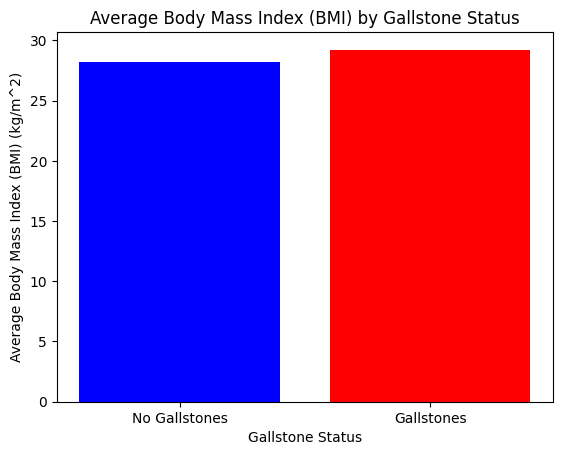

In [132]:
bars = plt.bar(average_bmi["Gallstone Status"], average_bmi["Average BMI"], color=['blue', 'red'])
plt.title("Average Body Mass Index (BMI) by Gallstone Status")
plt.xlabel("Gallstone Status")
plt.ylabel("Average Body Mass Index (BMI) (kg/m^2)")

In [133]:
bmi_with_gallstones = df[df['Gallstone Status'] == 'Gallstones']['Body Mass Index (BMI)']
bmi_without_gallstones = df[df['Gallstone Status'] == 'No Gallstones']['Body Mass Index (BMI)']

There is a significant difference in the average Body Mass Index (BMI) between individuals with and without gallstones.

In [134]:
x_pos_without = np.zeros(len(bmi_without_gallstones))
x_pos_with = np.ones(len(bmi_with_gallstones))
jitter_amount = 0.2
x_jittered_without = x_pos_without + np.random.uniform(-jitter_amount, jitter_amount, len(x_pos_without))
x_jittered_with = x_pos_with + np.random.uniform(-jitter_amount, jitter_amount, len(x_pos_with))

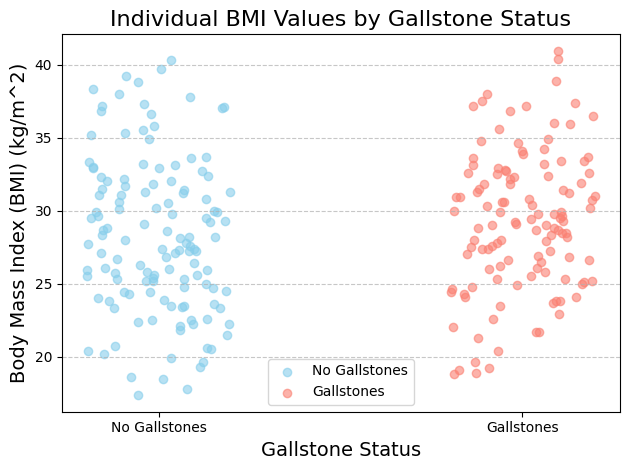

In [135]:
plt.scatter(x_jittered_without, bmi_without_gallstones, alpha=0.6, label='No Gallstones', color='skyblue')
plt.scatter(x_jittered_with, bmi_with_gallstones, alpha=0.6, label='Gallstones', color='salmon')
plt.title("Individual BMI Values by Gallstone Status", fontsize=16)
plt.xlabel("Gallstone Status", fontsize=14)
plt.ylabel("Body Mass Index (BMI) (kg/m^2)", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Gallstones', 'Gallstones'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There is a significant difference in the average BMI between individuals with and without gallstones.

In [136]:
t_statistic, p_value = ttest_ind(bmi_with_gallstones.dropna(), bmi_without_gallstones.dropna(), equal_var=False)

print(f"\nT-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


T-Statistic: 1.5201
P-Value: 0.1298


In [139]:
alpha = 0.05
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level (alpha={alpha}), we can reject the null hypothesis.")
    print("This suggests there is a statistically significant difference in the average BMI between individuals with and without gallstones.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level (alpha={alpha}), we cannot reject the null hypothesis.")
    print("This suggests there is no statistically significant difference in the average BMI between individuals with and without gallstones.")

Since the p-value (0.1298) is greater than the significance level (alpha=0.05), we cannot reject the null hypothesis.
This suggests there is no statistically significant difference in the average BMI between individuals with and without gallstones.


The alpha value determines whether or not the data is due to random chance.

1. Check for duplicate rows.
2. Verify Data types and Encoding.
3. Identify Outliers.
4. Scale or Normalize continuous features.
5. Feature Consistency Check: Look for low varience features, look at correlation, assess feature redundancy.
6.Target/Label is having correct values (0/1)
7. Ensure all your numerical features are having consistent units (cholesterol in mg/dL, GFR mL)
8. Units/ranges documentation.
9. Maintain clarity and reproductibility.
10. Crosscheck against dataset documentation.